In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2D PCA for installation number

In [2]:
df = pd.read_csv('data/pivot.csv', low_memory=False)
df.head(5)

,Year,Consumer_number,Consumer_type,Installation_number,1,2,3,4,5,6,7,8,9,10,11,12
0,2014,1,3,3069,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,0.0,0.0,0.0
1,2014,5,1,5,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,7,2,7,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,11,1,11,5.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,13,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = [[1, 'DOMÉSTICO'], [2, ' COM/INDUSTRIAL/OBRAS'], [3, 'UTIL.PUBLICA'], [4, 'OBRAS'], [5, 'ESTADO'], 
              [6, 'IGREJAS'], [7, 'EXP.A.RURAL'], [9, 'RURAL DOMÉSTICO'], [10, 'RURAL/ESTADO'], [11, 'FAM.NUMEROSAS'], 
              [12, 'FAM.CARENCIADAS'], [13, 'NUMER./CARENC.'], [14, 'CP.DOM/URB'], [15, 'CP.COM/URB'], [16, 'CP.DOM/RURAL'], 
              [17, 'CP.COM/RURAL'], [18, 'IPSS/IGR/RURAL'], [19, 'DOM./RURAL A.S'], [20, 'COM./RURAL A.S'], 
              [21, 'REGA'], [22, 'CMB']]
cons_tipos = pd.DataFrame(data, columns = ['Consumer_type', 'Name'])


In [4]:
monthes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [8]:
df_2019 = df[df['Year'] == 2019].drop(columns={'Year'})
df_2018 = df[df['Year'] == 2018].drop(columns={'Year'})
df_2020 = df[df['Year'] == 2020].drop(columns={'Year'})

In [9]:
df_2019 = pd.merge(df_2019, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'}).rename(columns={'Name':'Consumer_type'})
df_2018 = pd.merge(df_2018, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'}).rename(columns={'Name':'Consumer_type'})
df_2020 = pd.merge(df_2020, cons_tipos, on="Consumer_type").drop(columns={'Consumer_type'}).rename(columns={'Name':'Consumer_type'})
df_2020.head()

,Consumer_number,Installation_number,1,2,3,4,5,6,7,8,9,10,11,12,Consumer_type
0,1,3069,0.0,0.0,162.0,0.0,0.0,245.0,193.0,0.0,0.0,0.0,0.0,0.0,UTIL.PUBLICA
1,229,229,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,UTIL.PUBLICA
2,261,261,28.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,16.0,11.0,UTIL.PUBLICA
3,478,478,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,124.0,UTIL.PUBLICA
4,521,521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,UTIL.PUBLICA


# Dimension reduce for each year 

In [18]:
pca = PCA(n_components=2)
x_2019 = df_2019.loc[:, monthes].values
# print('x shape:', x.shape)
y_2019 = df_2019.loc[:,['Installation_number']].values
# print('y shape:', y.shape)
x_2019 = StandardScaler().fit_transform(x_2019)
principalComponents_2019 = pca.fit_transform(x_2019)
principalDf_2019 = pd.DataFrame(data = principalComponents_2019,
                                columns = ['x', 'y'])
# principalDf.head(5)

In [15]:
print("\n______2018 year______\n")
x_2018 = df_2018.loc[:, monthes].values
print('x 2018 shape:', x_2018.shape)
y_2018 = df_2018.loc[:,['Installation_number']].values
print('y 2018 shape:', y_2018.shape)
x_2018 = StandardScaler().fit_transform(x_2018)
principalComponents_2018 = pca.fit_transform(x_2018)
principalDf_2018 = pd.DataFrame(data = principalComponents_2018
             , columns = ['x', 'y'])
principalDf_2018.head(5)


______2018 year______

x 2018 shape: (18483, 12)
y 2018 shape: (18483, 1)


,x,y
0,4.937686,-1.542418
1,1.982019,-3.289754
2,0.428203,-0.508006
3,1.327462,-1.219267
4,-0.318772,0.124511


In [16]:
print("\n______2020 year______\n")
x_2020 = df_2020.loc[:, monthes].values
print('x 2020 shape:', x_2020.shape)
y_2020 = df_2020.loc[:,['Installation_number']].values
print('y 2020 shape:', y_2020.shape)
x_2020 = StandardScaler().fit_transform(x_2020)
principalComponents_2020 = pca.fit_transform(x_2020)
principalDf_2020 = pd.DataFrame(data = principalComponents_2020
             , columns = ['x', 'y'])
principalDf_2020.head(5)


______2020 year______

x 2020 shape: (19092, 12)
y 2020 shape: (19092, 1)


,x,y
0,6.667627,-0.343426
1,0.280894,0.438262
2,1.257251,-0.420292
3,3.352878,-4.278836
4,0.668835,-0.533966


In [20]:
print("\n______Clusters for each year year______\n")

clf_2018 = DBSCAN(eps=0.2, min_samples=3).fit(principalDf_2018)
labels_2018 = clf_2018.labels_
n_clusters_2018 = len(set(labels_2018)) - (1 if -1 in labels_2018 else 0)
print("\nClusters discovered 2018: %d" % n_clusters_2018)

clf_2019 = DBSCAN(eps=0.2, min_samples=3).fit(principalDf_2019)
labels_2019 = clf_2019.labels_
n_clusters_2019 = len(set(labels_2019)) - (1 if -1 in labels_2019 else 0)
print("\nClusters discovered 2019: %d" % n_clusters_2019)

clf_2020 = DBSCAN(eps=0.2, min_samples=3).fit(principalDf_2020)
labels_2020 = clf_2020.labels_
n_clusters_2020 = len(set(labels_2020)) - (1 if -1 in labels_2020 else 0)
print("\nClusters discovered 2020: %d" % n_clusters_2020)



______Clusters for each year year______


Clusters discovered 2018: 10

Clusters discovered 2019: 8

Clusters discovered 2020: 6


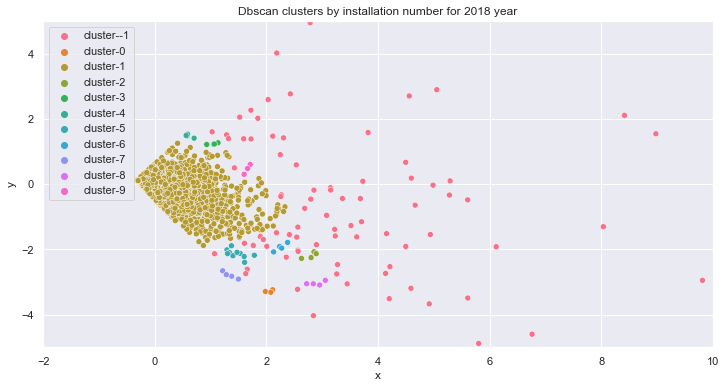

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(principalDf_2018['x'], principalDf_2018['y'], hue=["cluster-{}".format(x) for x in labels_2018])
plt.xlim([-2, 10])
plt.ylim([-5, 5])
plt.title('Dbscan clusters by installation number for 2018 year')
plt.savefig("charts/dbscan/dbscan_pca_inst_num.png", bbox_inches='tight')
plt.show()

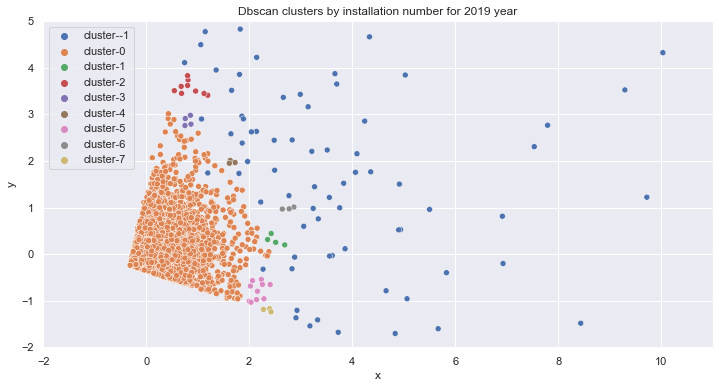

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(principalDf_2019['x'], principalDf_2019['y'], hue=["cluster-{}".format(x) for x in labels_2019])
plt.xlim([-2, 11])
plt.ylim([-2, 5])
plt.title('Dbscan clusters by installation number for 2019 year')
plt.savefig("charts/dbscan/dbscan_pca_inst_num_2019.png", bbox_inches='tight')
plt.show()

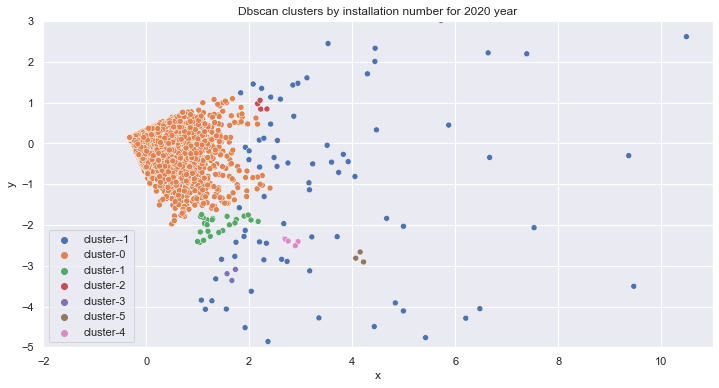

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(principalDf_2020['x'], principalDf_2020['y'], hue=["cluster-{}".format(x) for x in labels_2020])
plt.xlim([-2, 11])
plt.ylim([-5, 3])
plt.title('Dbscan clusters by installation number for 2020 year')
plt.savefig("charts/dbscan/dbscan_pca_inst_num_2020.png", bbox_inches='tight')
plt.show()

In [30]:
labels_2018 = pd.DataFrame(labels_2018, columns=['Label'])
labels_2019 = pd.DataFrame(labels_2019, columns=['Label'])
labels_2020 = pd.DataFrame(labels_2020, columns=['Label'])
# labels_2018.loc[labels_2018["Label"] == -1, "Label"] = 8
# labels.head()

In [104]:
print(len(principalDf))
print(len(df_2019))
print(len(labels))

18842
18842
18842


In [33]:
inst_n_2018 = df_2018.reset_index().drop(columns = {'Consumer_number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'index'})
inst_n_2019 = df_2019.reset_index().drop(columns = {'Consumer_number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'index'})
inst_n_2020 = df_2020.reset_index().drop(columns = {'Consumer_number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'index'})

In [37]:
finalDf_2018 = principalDf_2018.join(inst_n_2018, how='outer').join(labels_2018, how='outer').drop(columns=['x', 'y', 'Installation_number'])
finalDf_2019 = principalDf_2019.join(inst_n_2019, how='outer').join(labels_2019, how='outer').drop(columns=['x', 'y', 'Installation_number'])
finalDf_2020 = principalDf_2020.join(inst_n_2020, how='outer').join(labels_2020, how='outer').drop(columns=['x', 'y', 'Installation_number'])

In [39]:
finalDf_2018['Count'] = finalDf_2018['Consumer_type']
finalDf_2018 = finalDf_2018.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})

finalDf_2019['Count'] = finalDf_2019['Consumer_type']
finalDf_2019 = finalDf_2019.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})

finalDf_2020['Count'] = finalDf_2020['Consumer_type']
finalDf_2020 = finalDf_2020.groupby(['Label', 'Consumer_type'], as_index=False).agg({'Count':'count'})
finalDf_2020.head()

,Label,Consumer_type,Count
0,-1,COM/INDUSTRIAL/OBRAS,33
1,-1,CMB,18
2,-1,DOMÉSTICO,18
3,-1,ESTADO,13
4,-1,IPSS/IGR/RURAL,5


In [40]:
pivot_2018 = pd.pivot(finalDf_2018, values='Count', index=['Label'],
                    columns=['Consumer_type']).fillna(0)
pivot_2018 = pivot_2018.rename_axis(None,axis=1).reset_index()

pivot_2019 = pd.pivot(finalDf_2019, values='Count', index=['Label'],
                    columns=['Consumer_type']).fillna(0)
pivot_2019 = pivot_2019.rename_axis(None,axis=1).reset_index()

pivot_2020 = pd.pivot(finalDf_2020, values='Count', index=['Label'],
                    columns=['Consumer_type']).fillna(0)
pivot_2020 = pivot_2020.rename_axis(None,axis=1).reset_index()
pivot_2020.head()

,Label,COM/INDUSTRIAL/OBRAS,CMB,COM./RURAL A.S,CP.COM/RURAL,CP.DOM/URB,DOM./RURAL A.S,DOMÉSTICO,ESTADO,EXP.A.RURAL,FAM.CARENCIADAS,FAM.NUMEROSAS,IGREJAS,IPSS/IGR/RURAL,OBRAS,REGA,RURAL DOMÉSTICO,RURAL/ESTADO,UTIL.PUBLICA
0,-1,33.0,18.0,0.0,0.0,0.0,0.0,18.0,13.0,0.0,0.0,0.0,0.0,5.0,3.0,12.0,11.0,0.0,16.0
1,0,1123.0,49.0,7.0,1.0,55.0,509.0,11673.0,37.0,107.0,82.0,7.0,3.0,16.0,212.0,22.0,4941.0,54.0,26.0
2,1,3.0,2.0,0.0,0.0,0.0,1.0,10.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
cluster_0_2018 = pivot_2018[pivot_2018['Label'] == 0]
cluster_0_2019 = pivot_2019[pivot_2019['Label'] == 0]
cluster_0_2020 = pivot_2020[pivot_2020['Label'] == 0]

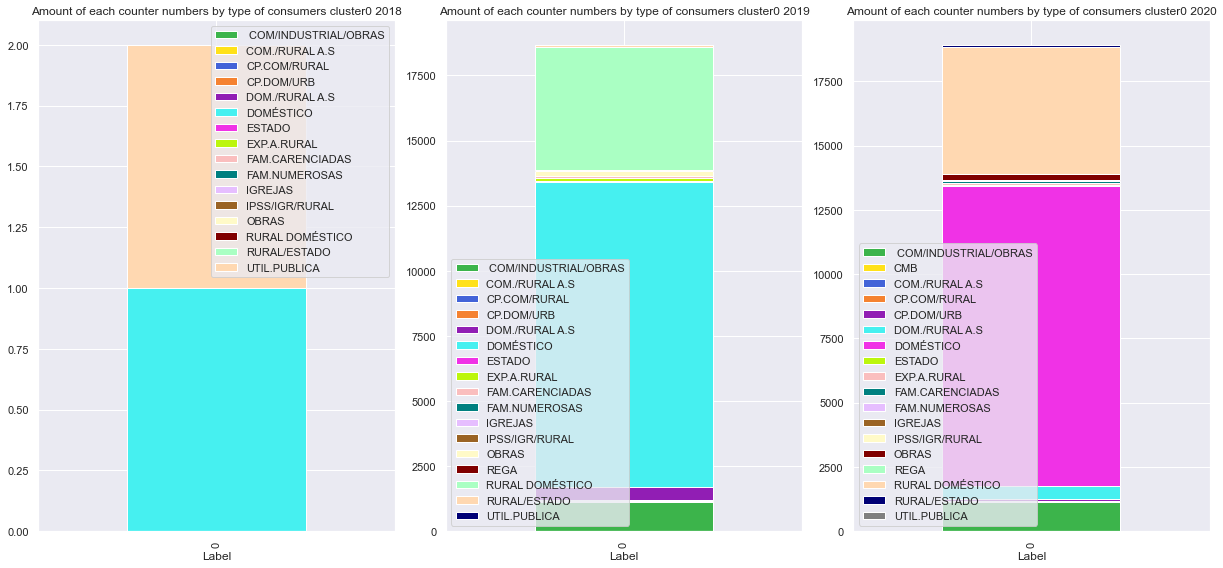

In [72]:
fig2, axes = plt.subplots(nrows=1, ncols=3)
cl_2018 = cluster_0_2018.plot(figsize=(17,8), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[0]).set_title('Amount of each counter numbers by type of consumers cluster0 2018')
cl_2019 = cluster_0_2019.plot(figsize=(17,8), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[1]).set_title('Amount of each counter numbers by type of consumers cluster0 2019')
cl_2020 = cluster_0_2020.plot(figsize=(17,8), x='Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[2]).set_title('Amount of each counter numbers by type of consumers cluster0 2020')

 

plt.savefig("charts/dbscan/dbscan_pca_cluster0_installation_number_profile.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [66]:
cluster_1_8_2018 = pivot_2018[pivot_2018['Label'] != 0]
cluster_1_8_2019 = pivot_2019[pivot_2019['Label'] != 0]
cluster_1_8_2020 = pivot_2020[pivot_2020['Label'] != 0]

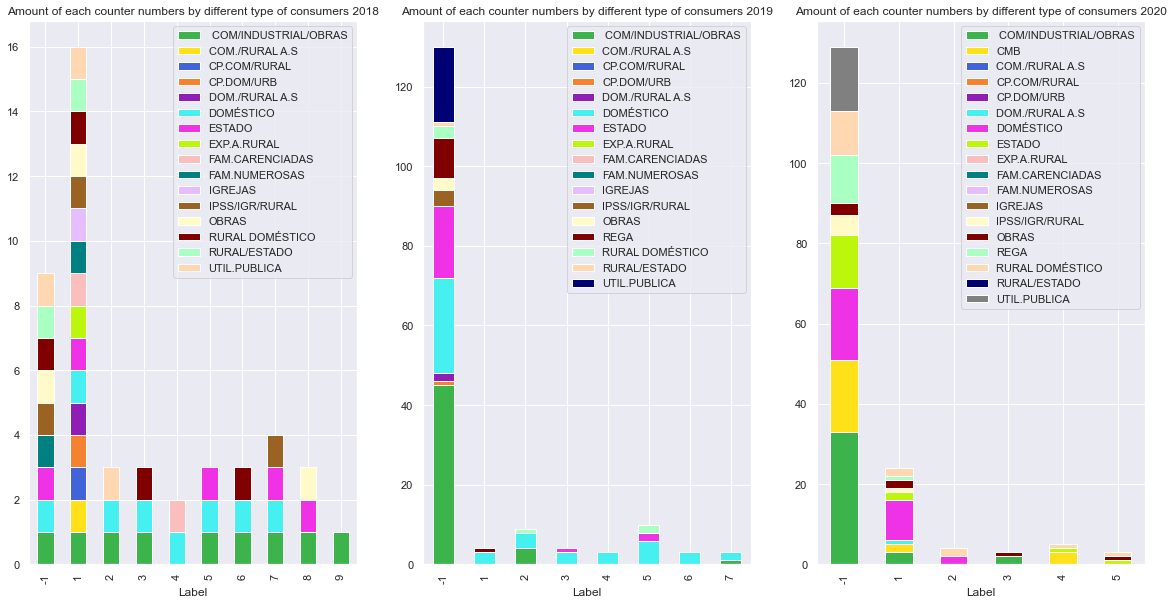

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3)
cluster_1_8_2018.plot(figsize=(20,10), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[0]).set_title('Amount of each counter numbers by different type of consumers 2018')
cluster_1_8_2019.plot(figsize=(20,10), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[1]).set_title('Amount of each counter numbers by different type of consumers 2019')
cluster_1_8_2020.plot(figsize=(20,10), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'], ax=axes.flatten()[2]).set_title('Amount of each counter numbers by different type of consumers 2020')
 
# # labels for x & y axis
# plt.ylabel('Count of each consumer type')
# plt.xlabel('Clusters')
 
# # title of plot
# plt.title('Amount of each counter numbers by different type of consumers')
plt.savefig("charts/dbscan/dbscan_pca_cluster_installation_number_profile_1_8.png", bbox_inches='tight')
plt.show()

# 3D PCA for installation number

In [117]:
x = df_2019.loc[:, monthes].values
print('x shape:', x.shape)
y = df_2019.loc[:,['Installation_number']].values
print('y shape:', y.shape)
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf_3d = pd.DataFrame(data = principalComponents
             , columns = ['x', 'y', 'z'])
principalDf_3d.head(5)

x shape: (18842, 12)
y shape: (18842, 1)


,x,y,z
0,5.418348,16.501546,-22.609549
1,1.093360,0.605794,-1.220702
2,3.178637,-1.540801,-0.905952
3,-0.264769,-0.201461,0.029647
4,0.087999,-0.104291,-0.187462


In [119]:
clf = DBSCAN(eps=0.2, min_samples=3).fit(principalDf)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)
labels = pd.DataFrame(labels, columns=['Label'])
labels.loc[labels["Label"] == -1, "Label"] = 8


Clusters discovered: 8


In [120]:
principalDf_3d = principalDf_3d.join(labels)
principalDf_3d.head()

,x,y,z,Label
0,5.418348,16.501546,-22.609549,8
1,1.093360,0.605794,-1.220702,0
2,3.178637,-1.540801,-0.905952,8
3,-0.264769,-0.201461,0.029647,0
4,0.087999,-0.104291,-0.187462,0


In [121]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib qt

fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

x = np.array(principalDf_3d['x'])
y = np.array(principalDf_3d['y'])
z = np.array(principalDf_3d['z'])

ax.scatter(x,y,z, marker="s", c=principalDf_3d["Label"], s=40, cmap="hsv")
# Customize the z axis.
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(30, 40)

plt.show()